## Tiny ImageNet data exploration
This Notebook explores the Tiny_ImageNet dataset. The VGG-Z image classification model uses this dataset to train itself. The code in this notebook explores the file structure of the data, tinkers with construction of tensors from image data, that is then to be fed into Tensorflow projects.

Following packages are used:
- numpy and Pillow for extracting image data from jpegs
- matplotlib to plot image data
- os and glob to take a peek into the files and folders and manipulate them. More about glob's use [glob pypackage](https://pymotw.com/2/glob/)
- h5py to create, write and read a HDF5 file. More about the HDF5 file format and it's use [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). An intro to the python package that deals with this format [h5py](http://machinelearninguru.com/deep_learning/data_preparation/hdf5/hdf5.html#create). HDF5 is pretty much the industry standard.
- Pandas to deal with csv and text data. Most of the labels are stored in csv/text files, reading them will require the use of pandas
- cnn_utils has been copied from Andrew Ng's Deep Learning specialization course. It has a few helper functions


The following lines could be used as boiler plate code to load image data into Tensorflow projects

In [1]:
import numpy as np
import scipy
from PIL import Image
import matplotlib.pyplot as plt
import os
import h5py
import glob
from random import shuffle
import pandas as pd
from cnn_utils import *

%matplotlib inline

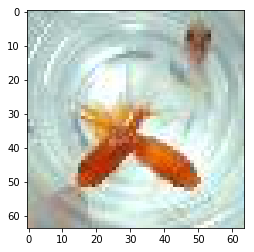

In [2]:
# change the last three digits of  the image file to view a different image
im = Image.open("data/Images/n01443537/images/n01443537_399.JPEG")
#im.show()
plt.imshow(np.asarray(im))

In [3]:
#Image_folders = []
#for filename in os.listdir('./data/Images'):
#    if filename.startswith("n"):
#        Image_folders.append(filename)

#Previous lines are equivalent to the following lines
Image_folders = [filename for filename in os.listdir("./data/Images") if filename.startswith("n")]
Image_folders

['n01629819', 'n01443537', 'n01641577']

In [4]:
os.listdir("./data/Images/n01629819/images")

['n01629819_387.JPEG',
 'n01629819_368.JPEG',
 'n01629819_411.JPEG',
 'n01629819_104.JPEG',
 'n01629819_5.JPEG',
 'n01629819_87.JPEG',
 'n01629819_68.JPEG',
 'n01629819_295.JPEG',
 'n01629819_446.JPEG',
 'n01629819_153.JPEG',
 'n01629819_91.JPEG',
 'n01629819_283.JPEG',
 'n01629819_329.JPEG',
 'n01629819_450.JPEG',
 'n01629819_145.JPEG',
 'n01629819_391.JPEG',
 'n01629819_29.JPEG',
 'n01629819_407.JPEG',
 'n01629819_112.JPEG',
 'n01629819_305.JPEG',
 'n01629819_52.JPEG',
 'n01629819_240.JPEG',
 'n01629819_493.JPEG',
 'n01629819_169.JPEG',
 'n01629819_186.JPEG',
 'n01629819_352.JPEG',
 'n01629819_217.JPEG',
 'n01629819_344.JPEG',
 'n01629819_13.JPEG',
 'n01629819_201.JPEG',
 'n01629819_128.JPEG',
 'n01629819_44.JPEG',
 'n01629819_313.JPEG',
 'n01629819_256.JPEG',
 'n01629819_485.JPEG',
 'n01629819_190.JPEG',
 'n01629819_9.JPEG',
 'n01629819_108.JPEG',
 'n01629819_221.JPEG',
 'n01629819_364.JPEG',
 'n01629819_33.JPEG',
 'n01629819_276.JPEG',
 'n01629819_299.JPEG',
 'n01629819_64.JPEG',
 

In [5]:
Image_folders

['n01629819', 'n01443537', 'n01641577']

The main package that is being used to pipe image data into a standard Tensorflow project is h5py. Let's see how that works. 
- First, we need to read all the jpeg filenames of images into a list to keep track.
- second, we experiment with the h5py package by creating a HDF5 file
- Finally, we take one folder from the dataset and save it as a HDF5 file

In [6]:
# store all the image names in a list
Image_addresses = []
for folder in Image_folders:
    path = 'data/Images/' + folder + '/images/*.JPEG'
    Image_addresses.append(glob.glob(path))
    
print(len(Image_addresses))

3


In [7]:
# random checks
Image_addresses[1]

['data/Images/n01443537/images/n01443537_254.JPEG',
 'data/Images/n01443537/images/n01443537_311.JPEG',
 'data/Images/n01443537/images/n01443537_468.JPEG',
 'data/Images/n01443537/images/n01443537_192.JPEG',
 'data/Images/n01443537/images/n01443537_487.JPEG',
 'data/Images/n01443537/images/n01443537_203.JPEG',
 'data/Images/n01443537/images/n01443537_346.JPEG',
 'data/Images/n01443537/images/n01443537_215.JPEG',
 'data/Images/n01443537/images/n01443537_350.JPEG',
 'data/Images/n01443537/images/n01443537_429.JPEG',
 'data/Images/n01443537/images/n01443537_242.JPEG',
 'data/Images/n01443537/images/n01443537_307.JPEG',
 'data/Images/n01443537/images/n01443537_184.JPEG',
 'data/Images/n01443537/images/n01443537_491.JPEG',
 'data/Images/n01443537/images/n01443537_393.JPEG',
 'data/Images/n01443537/images/n01443537_239.JPEG',
 'data/Images/n01443537/images/n01443537_110.JPEG',
 'data/Images/n01443537/images/n01443537_26.JPEG',
 'data/Images/n01443537/images/n01443537_405.JPEG',
 'data/Images

In [8]:
# each list in the Image_addresses list corresponds to image files of a particular class
length = len(Image_addresses[0])
length

500

In [9]:
# create a sample dataset hdf5 file
hdf5_path = './data/sample_dataset.hdf5'

# shape of the tensor that is to be written into the hdf5 file
sample_dataset_shape = (len(Image_addresses[0]), 64, 64, 3)

# create the hdf5 file
hdf5_file = h5py.File(hdf5_path, mode = 'w')
hdf5_file.create_dataset("sample_training_set", sample_dataset_shape, np.uint8)
for i in range(length):
    img = Image.open(Image_addresses[0][i])
    hdf5_file["sample_training_set"][i, ...] = np.asarray(img)[None]
    
# save and close the file
hdf5_file.close()
img.close()

Next step, we try and read the created hdf5 file and display the images 

In [10]:
hdf5_read_path = './data/sample_dataset.hdf5'
hdf5_read_file = h5py.File(hdf5_read_path, mode = 'r')
total_num_samples = hdf5_read_file["sample_training_set"].shape
total_num_samples

(500, 64, 64, 3)

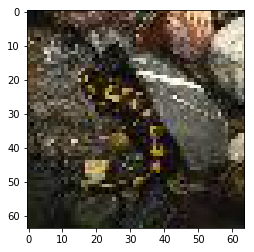

In [11]:
image = hdf5_read_file['sample_training_set'][299]
plt.imshow(image)

In [12]:
hdf5_read_file.close()


All right, now we take what we have learnt and try creating train/test hdf5 files. These are then gonna be used by the VGGNet-Z classification model to train and predict the 200 classes given in the Tiny ImageNet dataset. The VGGZ has utilized the Tensorflow framework, hence the construction of tensors.
The main data is placed in the Tiny-ImageNet folder(download the dataset and place it exactly here). Lets first explore that folder:

In [13]:
os.listdir('./data/tiny-imagenet-200/train')

['n02795169',
 'n02769748',
 'n07920052',
 'n02917067',
 'n01629819',
 'n02058221',
 'n02793495',
 'n04251144',
 'n02814533',
 'n02837789',
 'n01770393',
 'n01910747',
 'n03649909',
 'n02124075',
 'n01774750',
 'n06596364',
 'n03838899',
 'n02480495',
 'n09256479',
 'n03085013',
 'n01443537',
 'n04376876',
 'n03404251',
 'n03930313',
 'n03089624',
 'n04371430',
 'n04254777',
 'n02909870',
 'n07614500',
 'n02977058',
 'n04259630',
 'n07579787',
 'n02950826',
 '.DS_Store',
 'n02279972',
 'n03424325',
 'n03854065',
 'n02403003',
 'n01742172',
 'n01882714',
 'n03977966',
 'n02669723',
 'n02226429',
 'n04366367',
 'n02002724',
 'n03891332',
 'n01768244',
 'n02509815',
 'n03544143',
 'n02321529',
 'n02099601',
 'n02948072',
 'n04456115',
 'n02236044',
 'n03126707',
 'n02074367',
 'n03255030',
 'n01950731',
 'n02268443',
 'n04501370',
 'n03970156',
 'n04099969',
 'n04023962',
 'n02085620',
 'n02823428',
 'n04265275',
 'n02113799',
 'n01784675',
 'n03706229',
 'n03100240',
 'n04532106',
 'n027

Looks like all the training data has been ordered into respective class folders. Constructing any meaninful and usable dataset would involve the following steps:
- create a labeled structure for each folder train/val/test(tag it with a one hot encoding)
- shuffle the labels and the dataset in the same order
- create a hdf5 file for the train/val/test datasets

In [14]:
# creating labels for the train/val/test sets

# retrieve all folder names from train folder and maintain it in a list
tiny_image_train_folders = [filename for filename in sorted(os.listdir('./data/tiny-imagenet-200/train')) if filename.startswith('n')]
folder_length = len(tiny_image_train_folders)

# create a list for the labels
# ???? There has to be a better way to do this, come on!! tf.one_hot()???
labels = {}
for i in range(folder_length):
    label = []
    for j in range(folder_length):
        if i == j:
            label.append(1.0)
        else:
            label.append(0.0)
    labels[tiny_image_train_folders[i]] = label
labels

{'n01443537': [1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,


In [15]:
# create a list of all the image addresses along with the corresponding labels
train_image_addresses = []
train_image_labels_final = []
for i in range(folder_length):
    path = './data/tiny-imagenet-200/train/'+tiny_image_train_folders[i]+'/images'
    #print(path)
    images = sorted(glob.glob(path+'/*.JPEG'))
    for image in images:
        train_image_labels_final.append(labels[tiny_image_train_folders[i]])
    train_image_addresses.append(images)
        

In [17]:
# DEBUG
print(len(train_image_addresses))
#print(len(train_image_labels))

200


In [18]:
# flatten the train_image_addresses list to build a X and Y dataset
train_image_addresses_final = flatten_list(train_image_addresses)

In [19]:
# DEBUG
print(len(train_image_addresses_final))
print(len(train_image_labels_final))

100000
100000


So our data lists containing the image data and the respective labels are finally ready. All we need to do is shuffle them and write them into a hdf5 file.

In [20]:
c = list(zip(train_image_addresses_final, train_image_labels_final))
shuffle(c)
train_image_addresses_final, train_image_labels_final = zip(*c)

In [21]:
# DEBUG
train_image_addresses_final

('./data/tiny-imagenet-200/train/n03042490/images/n03042490_36.JPEG',
 './data/tiny-imagenet-200/train/n02268443/images/n02268443_51.JPEG',
 './data/tiny-imagenet-200/train/n03100240/images/n03100240_101.JPEG',
 './data/tiny-imagenet-200/train/n07695742/images/n07695742_179.JPEG',
 './data/tiny-imagenet-200/train/n07614500/images/n07614500_387.JPEG',
 './data/tiny-imagenet-200/train/n02321529/images/n02321529_214.JPEG',
 './data/tiny-imagenet-200/train/n02950826/images/n02950826_300.JPEG',
 './data/tiny-imagenet-200/train/n02815834/images/n02815834_402.JPEG',
 './data/tiny-imagenet-200/train/n03388043/images/n03388043_411.JPEG',
 './data/tiny-imagenet-200/train/n01784675/images/n01784675_482.JPEG',
 './data/tiny-imagenet-200/train/n04398044/images/n04398044_296.JPEG',
 './data/tiny-imagenet-200/train/n03089624/images/n03089624_464.JPEG',
 './data/tiny-imagenet-200/train/n07614500/images/n07614500_20.JPEG',
 './data/tiny-imagenet-200/train/n04149813/images/n04149813_115.JPEG',
 './data/

In [22]:
# DEBUG to check whether the labels remain sane
train_image_labels_final[0]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

Doing the same with the test and validation datasets to create corresponding labels. The test set does not have a corresponding label set.

In [23]:
# capturing the test set data
test_image_addresses_final = []
path = './data/tiny-imagenet-200/test/images'
test_image_addresses_final = glob.glob(path+'/*.JPEG')

# capturing the validation set data
val_image_addresses_final = []
val_image_labels = []
path = './data/tiny-imagenet-200/val/images'
val_image_addresses_final = sorted(glob.glob(path+'/*.JPEG'))

In [24]:
test_image_addresses_final

['./data/tiny-imagenet-200/test/images/test_6235.JPEG',
 './data/tiny-imagenet-200/test/images/test_4208.JPEG',
 './data/tiny-imagenet-200/test/images/test_3037.JPEG',
 './data/tiny-imagenet-200/test/images/test_9590.JPEG',
 './data/tiny-imagenet-200/test/images/test_6665.JPEG',
 './data/tiny-imagenet-200/test/images/test_4658.JPEG',
 './data/tiny-imagenet-200/test/images/test_7977.JPEG',
 './data/tiny-imagenet-200/test/images/test_3467.JPEG',
 './data/tiny-imagenet-200/test/images/test_382.JPEG',
 './data/tiny-imagenet-200/test/images/test_5419.JPEG',
 './data/tiny-imagenet-200/test/images/test_7424.JPEG',
 './data/tiny-imagenet-200/test/images/test_2626.JPEG',
 './data/tiny-imagenet-200/test/images/test_3934.JPEG',
 './data/tiny-imagenet-200/test/images/test_1909.JPEG',
 './data/tiny-imagenet-200/test/images/test_678.JPEG',
 './data/tiny-imagenet-200/test/images/test_8381.JPEG',
 './data/tiny-imagenet-200/test/images/test_5049.JPEG',
 './data/tiny-imagenet-200/test/images/test_7074.J

In [25]:
val_image_addresses_final

['./data/tiny-imagenet-200/val/images/val_0.JPEG',
 './data/tiny-imagenet-200/val/images/val_1.JPEG',
 './data/tiny-imagenet-200/val/images/val_10.JPEG',
 './data/tiny-imagenet-200/val/images/val_100.JPEG',
 './data/tiny-imagenet-200/val/images/val_1000.JPEG',
 './data/tiny-imagenet-200/val/images/val_1001.JPEG',
 './data/tiny-imagenet-200/val/images/val_1002.JPEG',
 './data/tiny-imagenet-200/val/images/val_1003.JPEG',
 './data/tiny-imagenet-200/val/images/val_1004.JPEG',
 './data/tiny-imagenet-200/val/images/val_1005.JPEG',
 './data/tiny-imagenet-200/val/images/val_1006.JPEG',
 './data/tiny-imagenet-200/val/images/val_1007.JPEG',
 './data/tiny-imagenet-200/val/images/val_1008.JPEG',
 './data/tiny-imagenet-200/val/images/val_1009.JPEG',
 './data/tiny-imagenet-200/val/images/val_101.JPEG',
 './data/tiny-imagenet-200/val/images/val_1010.JPEG',
 './data/tiny-imagenet-200/val/images/val_1011.JPEG',
 './data/tiny-imagenet-200/val/images/val_1012.JPEG',
 './data/tiny-imagenet-200/val/images/

In [26]:
data = pd.read_csv('./data/tiny-imagenet-200/val/val_annotations.txt', sep="\t", header=None)

In [27]:
val_set_length = len(data[0])
data[1]

0       n03444034
1       n04067472
2       n04070727
3       n02808440
4       n02808440
5       n04399382
6       n04179913
7       n02823428
8       n04146614
9       n02226429
10      n04371430
11      n07753592
12      n02226429
13      n03770439
14      n02056570
15      n02906734
16      n02125311
17      n04486054
18      n04285008
19      n03763968
20      n03814639
21      n03837869
22      n01983481
23      n01629819
24      n04532670
25      n04074963
26      n04540053
27      n04371430
28      n02906734
29      n02094433
          ...    
9970    n02988304
9971    n03584254
9972    n03837869
9973    n02190166
9974    n02321529
9975    n02190166
9976    n02963159
9977    n03100240
9978    n01945685
9979    n02410509
9980    n01641577
9981    n02814533
9982    n02132136
9983    n02106662
9984    n02999410
9985    n02948072
9986    n01910747
9987    n02837789
9988    n04146614
9989    n01629819
9990    n02132136
9991    n03930313
9992    n02231487
9993    n02927161
9994    n0

In [28]:
for name in data[1]:
    val_image_labels.append(labels[name])

In [29]:
val_image_labels

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [30]:
# shuffle the validation set as well
c = list(zip(val_image_addresses_final, val_image_labels))
shuffle(c)
val_image_addresses_final, val_image_labels = zip(*c)

Notebooks/python-scripts dedicated to exploring the dataset are very important to shorten the development cycle of an AI/ML project. The main reason for this notebook was to explore the Tiny Imagenet dataset and find any data point that is not congruent with the rest of the dataset. It so happens that 1821 images of the training images are in grayscale with a single channel. We'll have to convert grayscale to RGB before writing them into hdf5 files. The following code experiments with that.

In [31]:
# there seem to be grayscale images in the training set 
count = 0
grayscale_train_image_addresses = []
for i in range(len(train_image_addresses_final)):
        img = Image.open(train_image_addresses_final[i])
        if img.mode != 'RGB':
            count += 1
            grayscale_train_image_addresses.append(train_image_addresses_final[i])            
        img.close()
print(count)

1821


In [32]:
count = 0
grayscale_val_image_addresses = []
for i in range(len(val_image_addresses_final)):
        img = Image.open(val_image_addresses_final[i])
        if img.mode == 'L':
            count += 1
            grayscale_train_image_addresses.append(val_image_addresses_final[i])            
        img.close()
print(count)

168


In [33]:
count = 0
grayscale_test_image_addresses = []
for i in range(len(test_image_addresses_final)):
        img = Image.open(test_image_addresses_final[i])
        if img.mode == 'L':
            count += 1
            grayscale_test_image_addresses.append(test_image_addresses_final[i])            
        img.close()
print(count)

189


The necessary datasets that we will be needing to train the VGGZ model are in the following variables
- train_image_addresses_final - X_train
- train_image_labels_final - Y_train
- val_image_addresses_final - X_val
- val_image_labels - Y_val
- test_image_addresses_final - X_test

The last step will be to write these datasets into a hdf5 file to be called while training the VGGZ model

In [34]:
# create a train and test dataset hdf5 file
train_dataset_hdf5_path = './data/train_Tiny_ImageNet.hdf5'
test_val_dataset_hdf5_path = './data/test_val_Tiny_ImageNet.hdf5'

# shape of the tensor that is to be written into the hdf5 file
X_train_dataset_shape = (len(train_image_addresses_final), 64, 64, 3)
Y_train_dataset_shape = (len(train_image_labels_final), 200)
X_val_dataset_shape = (len(val_image_addresses_final), 64, 64, 3)
Y_val_dataset_shape = (len(val_image_labels), 200)
X_test_dataset_shape = (len(test_image_addresses_final), 64, 64, 3)

# create the hdf5 file with respective train/val/test fields
train_dataset_hdf5_file = h5py.File(train_dataset_hdf5_path, mode = 'w')
test_val_dataset_hdf5_file = h5py.File(test_val_dataset_hdf5_path, mode = 'w')
train_dataset_hdf5_file.create_dataset("X_train", X_train_dataset_shape, np.uint8)
train_dataset_hdf5_file.create_dataset("Y_train", Y_train_dataset_shape, np.uint8)
test_val_dataset_hdf5_file.create_dataset("X_val", X_val_dataset_shape, np.uint8)
test_val_dataset_hdf5_file.create_dataset("Y_val", Y_val_dataset_shape, np.uint8)
test_val_dataset_hdf5_file.create_dataset("X_test", X_test_dataset_shape, np.uint8)

# writing the image data and the labels into a hdf5 file
try:
    for i in range(len(train_image_addresses_final)):
        img = Image.open(train_image_addresses_final[i])
        if img.mode == 'RGB':
            train_dataset_hdf5_file["X_train"][i, ...] = np.asarray(img)[None]
        elif img.mode == 'L':
            rgbimg = Image.new("RGB", img.size)
            rgbimg.paste(img)
            train_dataset_hdf5_file["X_train"][i, ...] = np.asarray(rgbimg)[None]
        
    for i in range(len(val_image_addresses_final)):
        img = Image.open(val_image_addresses_final[i])
        if img.mode == 'RGB':
            test_val_dataset_hdf5_file["X_val"][i, ...] = np.asarray(img)[None]
        elif img.mode == 'L':
            rgbimg = Image.new("RGB", img.size)
            rgbimg.paste(img)
            test_val_dataset_hdf5_file["X_val"][i, ...] = np.asarray(rgbimg)[None]
        
        
    for i in range(len(test_image_addresses_final)):
        img = Image.open(test_image_addresses_final[i])
        if img.mode == 'RGB':
            test_val_dataset_hdf5_file["X_test"][i, ...] = np.asarray(img)[None]
        elif img.mode == 'L':
            rgbimg = Image.new("RGB", img.size)
            rgbimg.paste(img)
            test_val_dataset_hdf5_file["X_test"][i, ...] = np.asarray(rgbimg)[None]
        
    train_dataset_hdf5_file["Y_train"][...] = train_image_labels_final
    test_val_dataset_hdf5_file["Y_val"][...] = val_image_labels
finally:
    # save and close the file
    train_dataset_hdf5_file.close()
    test_val_dataset_hdf5_file.close()

NameError: name 'trian_dataset_hdf5_file' is not defined

In [36]:
train_dataset_hdf5_file.close()
test_val_dataset_hdf5_file.close()